## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade |
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [13]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

# Carregando o dataset de habitação da Califórnia
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.DataFrame(california_housing.target, columns=['MedHouseVal'])

# Visualização dos primeiros registros
print(X.head())
print(y.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
   MedHouseVal
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422


In [14]:
X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [15]:
y.head()

MedHouseVal
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Criar uma instância do modelo de árvore de decisão para regressão
regressor = DecisionTreeRegressor(random_state=42)

# Treinar o modelo no conjunto de treinamento
regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# Fazer previsões no conjunto de teste
y_pred = regressor.predict(X_test)

# Calcular o erro quadrático médio (MSE) e o coeficiente de determinação (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R²):", r2)

Erro Quadrático Médio (MSE): 0.495235205629094
Coeficiente de Determinação (R²): 0.622075845135081


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [19]:
# Importe as bibliotecas necessárias
import numpy as np

# Função para calcular o caminho indicado pelos CCP-alfas
def ccp_alphas_path(regressor):
    ccp_alphas = []
    impurities = []
    total_impurity = 0

    for ccp_alpha in regressor.cost_complexity_pruning_path(X_train, y_train).ccp_alphas:
        total_impurity += ccp_alpha
        ccp_alphas.append(ccp_alpha)
        impurities.append(total_impurity)

    return ccp_alphas, impurities

# Calcula o caminho indicado pelos CCP-alfas
ccp_alphas, impurities = ccp_alphas_path(regressor)

# Exibe os valores de CCP-alfa e impureza correspondentes
for alpha, impurity in zip(ccp_alphas, impurities):
    print("CCP-alfa:", alpha, "Impureza:", impurity)



Streaming output truncated to the last 5000 lines.
CCP-alfa: 3.140262348883496e-06 Impureza: 0.00498167944796699
CCP-alfa: 3.142805232558079e-06 Impureza: 0.004984822253199548
CCP-alfa: 3.147553139286169e-06 Impureza: 0.004987969806338834
CCP-alfa: 3.1497294896638064e-06 Impureza: 0.004991119535828498
CCP-alfa: 3.150280315613877e-06 Impureza: 0.004994269816144112
CCP-alfa: 3.150436046509299e-06 Impureza: 0.0049974202521906215
CCP-alfa: 3.1504360465103213e-06 Impureza: 0.0050005706882371315
CCP-alfa: 3.1504360465110197e-06 Impureza: 0.0050037211242836424
CCP-alfa: 3.154079861111134e-06 Impureza: 0.005006875204144753
CCP-alfa: 3.1577085352051772e-06 Impureza: 0.005010032912679959
CCP-alfa: 3.1591872577519484e-06 Impureza: 0.0050131920999377105
CCP-alfa: 3.162245639534581e-06 Impureza: 0.005016354345577245
CCP-alfa: 3.1653746770018585e-06 Impureza: 0.005019519720254247
CCP-alfa: 3.1689952761624693e-06 Impureza: 0.005022688715530409
CCP-alfa: 3.169604147074061e-06 Impureza: 0.0050258583196

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [20]:
import random

# Reduza o número de valores de alpha escolhendo uma amostragem aleatória
random.seed(42)  # Defina uma semente aleatória para reprodutibilidade
sample_size = 10  # Defina o tamanho da amostra desejado

# Certifique-se de que o tamanho da amostra não seja maior do que o número de valores de alpha disponíveis
if sample_size > len(ccp_alphas):
    sample_size = len(ccp_alphas)

alpha_subset = random.sample(ccp_alphas, sample_size)

# Lista para armazenar as árvores treinadas
trees = []

# Treine uma árvore para cada valor de alpha na amostra aleatória
for alpha in alpha_subset:
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)

# Verifique o número de árvores na lista (deve ser igual ao tamanho da amostra)
print("Número de árvores treinadas:", len(trees))


Número de árvores treinadas: 10


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

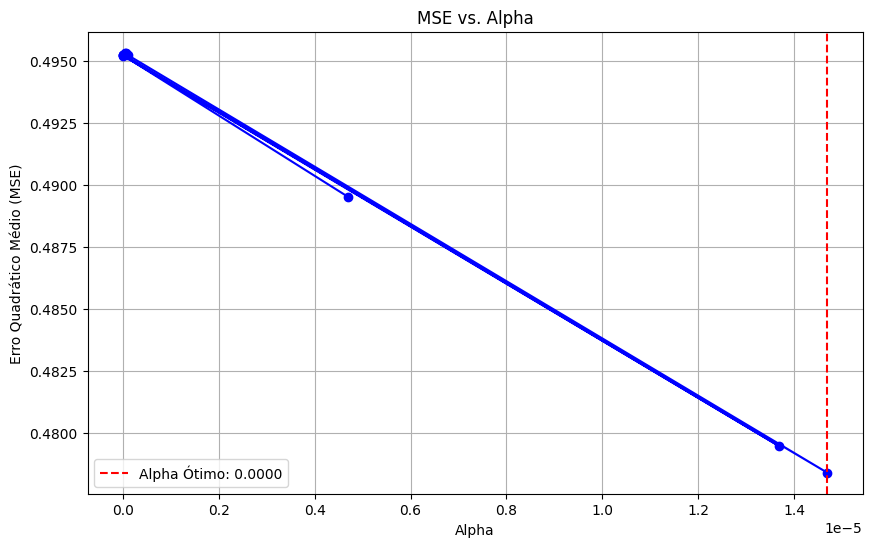

Valor de alpha ótimo: 0.0000


In [21]:
import matplotlib.pyplot as plt

# Lista para armazenar os valores de MSE
mse_values = []

# Calcula o MSE para cada árvore em relação aos valores de alpha
for alpha, tree in zip(alpha_subset, trees):
    y_pred = tree.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plota o gráfico MSE vs. Alpha
plt.figure(figsize=(10, 6))
plt.plot(alpha_subset, mse_values, marker='o', linestyle='-', color='b')
plt.title('MSE vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.grid(True)

# Encontre o valor mínimo de MSE e o valor de alpha correspondente
min_mse = min(mse_values)
optimal_alpha = alpha_subset[mse_values.index(min_mse)]

plt.axvline(optimal_alpha, color='r', linestyle='--', label=f'Alpha Ótimo: {optimal_alpha:.4f}')
plt.legend()
plt.show()

print(f"Valor de alpha ótimo: {optimal_alpha:.4f}")



### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [22]:
# Treine a árvore com o valor ótimo de alpha
optimal_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=optimal_alpha)
optimal_tree.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred_optimal = optimal_tree.predict(X_test)

# Calcule o R-quadrado
r2_optimal = r2_score(y_test, y_pred_optimal)

print("R-quadrado da árvore com valor ótimo de alpha:", r2_optimal)


R-quadrado da árvore com valor ótimo de alpha: 0.6349338199145771


### 7. Visualize esta árvore.

In [26]:
from sklearn.tree import export_graphviz
import graphviz

# Exporte a árvore treinada para um arquivo .dot
dot_data = export_graphviz(optimal_tree, out_file=None,
                           feature_names=X_train.columns,
                           filled=True, rounded=True,
                           special_characters=True)

# Crie um objeto graphviz a partir dos dados .dot
graph = graphviz.Source(dot_data)

# Exiba a árvore de decisão no notebook
graph
